In [2]:
# !pip install pysankey2

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [7]:
from pysankey2 import Sankey
from pysankey2.datasets import load_fruits

In [8]:
df = load_fruits()
df.head()

,layer1,layer2
0,blueberry,blueberry
1,apple,blueberry
2,blueberry,blueberry
3,lime,lime
4,orange,orange


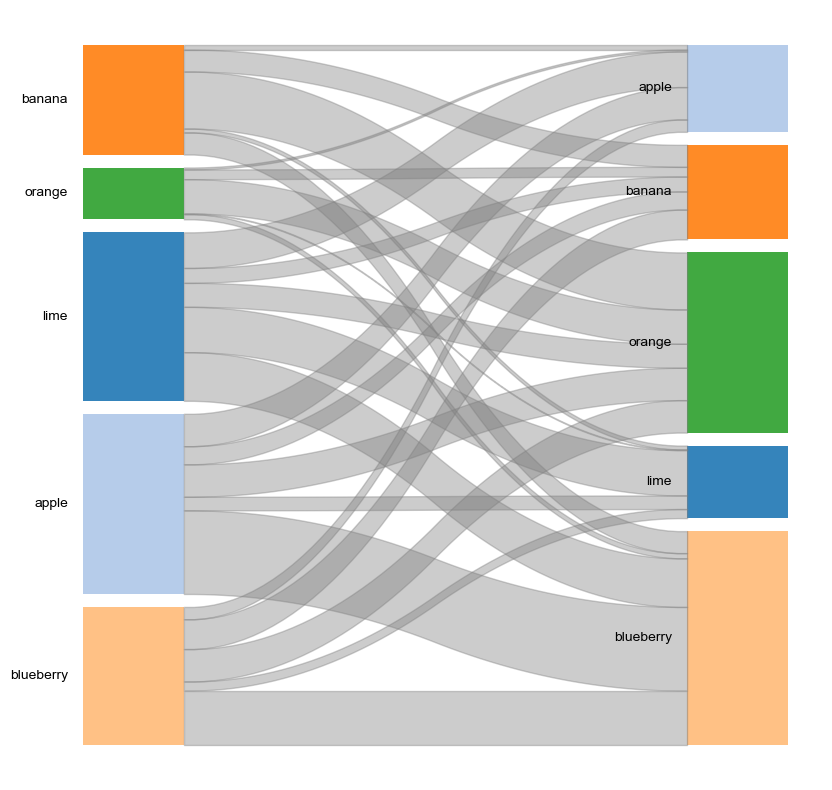

In [9]:
sky_auto_global_colors = Sankey(df,colorMode="global")
fig,ax = sky_auto_global_colors.plot()

In [12]:
from pysankey2.utils import setColorConf
fruits = list(set(df.layer1).union(set(df.layer2)))

# Specified the colors
# Here, we use 'Pastel1' colormaps(a shy bust fresh colormap :)).
# See matplotlib cmap for more colormaps:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html"""
colors = setColorConf(len(fruits),colors='Pastel1')
cls_map = dict(zip(fruits,colors))

# Specified the relative order in each layer.
layer_labels= {'layer1':['apple','banana','blueberry', 'lime', 'orange'],
                        'layer2':['apple','banana','blueberry', 'lime', 'orange']}

print(fruits)
print(colors)
print(cls_map)


['lime', 'apple', 'banana', 'blueberry', 'orange']
['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6']
{'lime': '#fbb4ae', 'apple': '#b3cde3', 'banana': '#ccebc5', 'blueberry': '#decbe4', 'orange': '#fed9a6'}


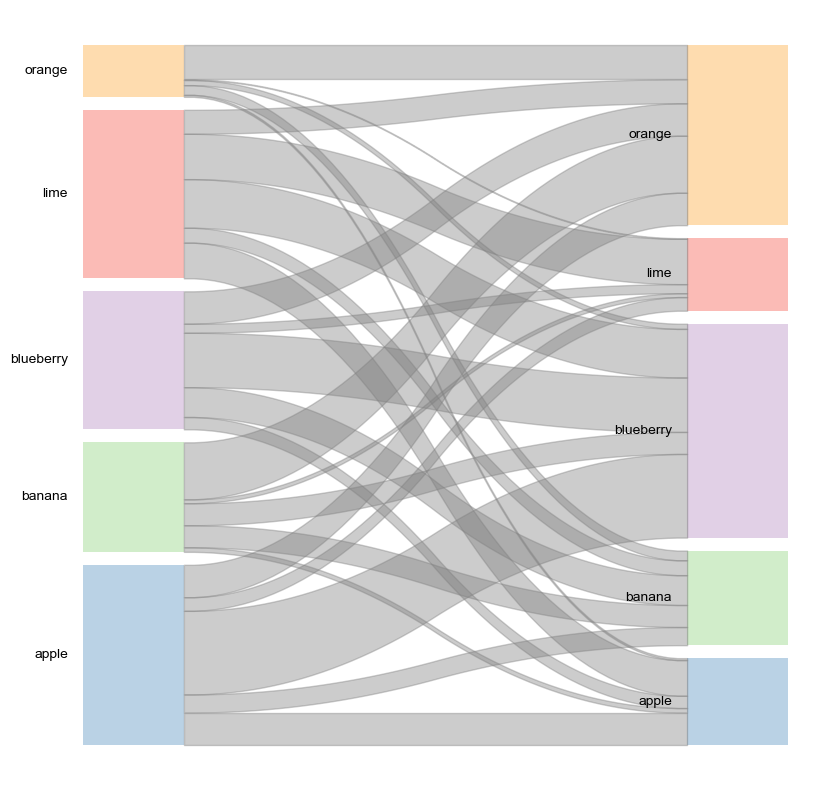

In [16]:
sky = Sankey(df,colorDict=cls_map,layerLabels = layer_labels,colorMode="global")
# set a bigger font size 
fig,ax = sky.plot()

In [18]:
from pysankey2 import Sankey
from pysankey2.datasets import load_countrys
df = load_countrys()
df.head()

,layer1,layer2,layer3
0,China,Canada,USA
1,England,China,Japan
2,USA,USA,England
3,Spain,China,USA
4,USA,USA,China


In [ ]:
sky_auto_global_colors = Sankey(df,colorMode="global")
fig,ax = sky_auto_global_colors.plot()

In [120]:
import pandas as pd

# species = pd.read_table('datas/tax_s_split.xls', names=[f"layer{i}" for i in range(1,21+1)])
species = pd.read_table('datas/tax_s_split.xls')
species8 = species[species.columns[0:8]]
print(species8.head())


        Domain                      Kingdom             Phylum  \
0  d__Bacteria  k__unclassified_d__Bacteria  p__Actinobacteria   
1  d__Bacteria  k__unclassified_d__Bacteria  p__Proteobacteria   
2   d__Viruses   k__unclassified_d__Viruses     p__Uroviricota   
3  d__Bacteria  k__unclassified_d__Bacteria      p__Firmicutes   
4  d__Bacteria  k__unclassified_d__Bacteria      p__Firmicutes   

                    Class                Order               Family  \
0       c__Actinobacteria     o__Micrococcales    f__Bogoriellaceae   
1  c__Gammaproteobacteria  o__Enterobacterales       f__Erwiniaceae   
2       c__Caudoviricetes      o__Caudovirales      f__Siphoviridae   
3              c__Bacilli   o__Lactobacillales  f__Leuconostocaceae   
4              c__Bacilli        o__Bacillales       f__Bacillaceae   

                             Genus                        Species  
0                     g__Georgenia           s__Georgenia_muralis  
1                       g__Pantoea      

In [121]:
speciesdf = species8[0:20]
print(speciesdf.shape)
cls_map = {}
for i in speciesdf.columns:
    cells = list(set(speciesdf[i]))
    cell_colors = setColorConf(len(cells),colors='Pastel1')
    cls_map_ll = dict(zip(cells,cell_colors))
    cls_map[i] = cls_map_ll
print(cls_map)

(20, 8)
{'Domain': {'d__Bacteria': '#fbb4ae', 'd__Eukaryota': '#b3cde3', 'd__Viruses': '#ccebc5'}, 'Kingdom': {'k__unclassified_d__Bacteria': '#fbb4ae', 'k__unclassified_d__Viruses': '#b3cde3', 'k__Fungi': '#ccebc5'}, 'Phylum': {'p__Proteobacteria': '#fbb4ae', 'p__Actinobacteria': '#b3cde3', 'p__Firmicutes': '#ccebc5', 'p__Ascomycota': '#decbe4', 'p__Uroviricota': '#fed9a6'}, 'Class': {'c__Actinobacteria': '#fbb4ae', 'c__Bacilli': '#b3cde3', 'c__Gammaproteobacteria': '#ccebc5', 'c__Dothideomycetes': '#decbe4', 'c__Betaproteobacteria': '#fed9a6', 'c__Alphaproteobacteria': '#ffffcc', 'c__Caudoviricetes': '#e5d8bd'}, 'Order': {'o__Rhodospirillales': '#fbb4ae', 'o__Lactobacillales': '#b3cde3', 'o__Bacillales': '#ccebc5', 'o__Caudovirales': '#decbe4', 'o__Micrococcales': '#fed9a6', 'o__Rhizobiales': '#ffffcc', 'o__Sphingomonadales': '#e5d8bd', 'o__Dothideales': '#fddaec', 'o__Enterobacterales': '#f2f2f2', 'o__Pseudomonadales': '#808080', 'o__Corynebacteriales': '#808080', 'o__Burkholderiale

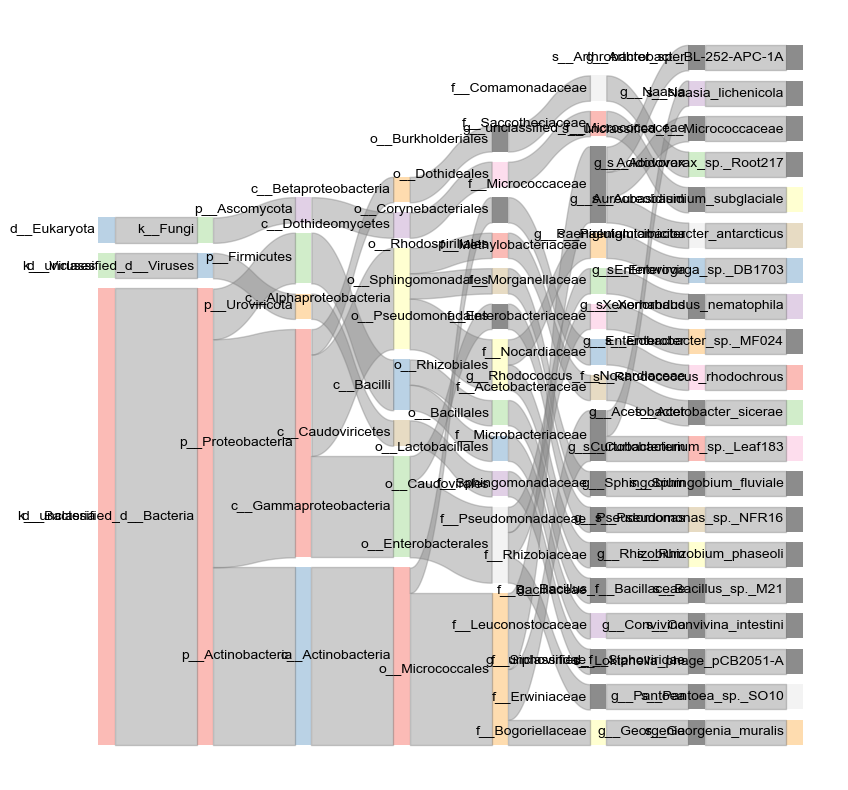

In [122]:
all_auto_global_colors = Sankey(speciesdf, colorDict=cls_map, colorMode='layer')
# all_auto_global_colors = Sankey(speciesdf,colorMode='global')
fig, ax = all_auto_global_colors.plot()

In [223]:
import pandas as pd

# species = pd.read_table('datas/tax_s_split.xls', names=[f"layer{i}" for i in range(1,21+1)])
species_ab = pd.read_table('datas/tax_s_split.xls')
sankey = species_ab[species_ab.columns[0:9]]

## ['d__Bacteria', 'd__Viruses', 'd__Eukaryota', 'd__Archaea','d__unclassified']
bac_sankey = sankey[sankey['Domain']=='d__Bacteria']
euk_sankey = sankey[sankey['Domain']=='d__Eukaryota']

def split_table(sankey:pd.DataFrame):
    ## 将数字拆开为表的每行记录
    sankey_split = pd.DataFrame(columns=species_ab.columns[0:8])
    # print(sankey_split)
    for counter in range(0,sankey.shape[0]):
        repeat_number = sankey.iloc[counter,-1]
        # print(sankey.iloc[counter,0:-1].to_frame().T) # series to dataframe perpared to concat with sankey_split (dataframe format)
        sankey_split = pd.concat([sankey_split] + [sankey.iloc[counter,0:-1].to_frame().T]*repeat_number, axis=0)
        # print(sankey_split)
    return sankey_split

bac_sankey_split = split_table(sankey=bac_sankey)
print(bac_sankey_split)
# euk_sankey_split = split_table(sankey=euk_sankey)
# print(euk_sankey_split)


           Domain                      Kingdom             Phylum  \
0     d__Bacteria  k__unclassified_d__Bacteria  p__Actinobacteria   
0     d__Bacteria  k__unclassified_d__Bacteria  p__Actinobacteria   
0     d__Bacteria  k__unclassified_d__Bacteria  p__Actinobacteria   
0     d__Bacteria  k__unclassified_d__Bacteria  p__Actinobacteria   
0     d__Bacteria  k__unclassified_d__Bacteria  p__Actinobacteria   
...           ...                          ...                ...   
7380  d__Bacteria  k__unclassified_d__Bacteria  p__Proteobacteria   
7380  d__Bacteria  k__unclassified_d__Bacteria  p__Proteobacteria   
7380  d__Bacteria  k__unclassified_d__Bacteria  p__Proteobacteria   
7380  d__Bacteria  k__unclassified_d__Bacteria  p__Proteobacteria   
7380  d__Bacteria  k__unclassified_d__Bacteria  p__Proteobacteria   

                       Class                Order             Family  \
0          c__Actinobacteria     o__Micrococcales  f__Bogoriellaceae   
0          c__Actinobacteri

In [224]:
def out2txt(sankey_split:pd.DataFrame):
    # bracken 6列：重要的是第二，四和六列
    print('0',sankey.shape[0],'0','R','0','root',sep='\t')
    for d in sankey['Domain'].unique():
        # print('domain',d)
        ddf = sankey[sankey['Domain']==d]
        print('0',ddf.shape[0],'0','D','0',f"{' '*6}{d}",sep='\t')
        for k in ddf['Kingdom'].unique():
            # print('kindom',k)
            kdf = ddf[ddf['Kingdom']==k]
            print('0',kdf.shape[0],'0','K','0',f"{' '*8}{k}",sep='\t')
            for p in kdf['Phylum'].unique():
                # print('phylum', p)
                pdf = kdf[kdf['Phylum']==p]
                print('0',pdf.shape[0],'0','P','0',f"{' '*10}{p}",sep='\t')
                for c in pdf['Class'].unique():
                    # print('class',c)
                    cdf = pdf[pdf['Class']==c]
                    print('0',cdf.shape[0],'0','C','0',f"{' '*12}{c}",sep='\t')
                    for o in cdf['Order'].unique():
                        # print('order',o)
                        odf = cdf[cdf['Order']==o]
                        print('0',odf.shape[0],'0','O','0',f"{' '*14}{o}",sep='\t')
                        for f in odf['Family'].unique():
                            # print('family',f)
                            fdf = odf[odf['Family']==f]
                            print('0',fdf.shape[0],'0','F','0',f"{' '*16}{f}",sep='\t')
                            for g in fdf['Genus'].unique():
                                # print('genus',g)
                                gdf = fdf[fdf['Genus']==g]
                                print('0',gdf.shape[0],'0','G','0',f"{' '*18}{g}",sep='\t')
                                for s in gdf['Species'].unique():
                                    # print('species', s)
                                    sdf = gdf[gdf['Species']==s]
                                    print('0',sdf.shape[0],'0','S','0',f"{' '*20}{s}",sep='\t')

# out2txt(sankey_split=euk_sankey_split)
out2txt(sankey_split=bac_sankey_split)

0	7382	0	R	0	root
0	6799	0	D	0	      d__Bacteria
0	6799	0	K	0	        k__unclassified_d__Bacteria
0	3272	0	P	0	          p__Actinobacteria
0	3211	0	C	0	            c__Actinobacteria
0	1021	0	O	0	              o__Micrococcales
0	15	0	F	0	                f__Bogoriellaceae
0	14	0	G	0	                  g__Georgenia
0	1	0	S	0	                    s__Georgenia_muralis
0	1	0	S	0	                    s__unclassified_g__Georgenia
0	1	0	S	0	                    s__Georgenia_sp._SYP-B2076
0	1	0	S	0	                    s__Georgenia_thermotolerans
0	1	0	S	0	                    s__Georgenia_sp._311
0	1	0	S	0	                    s__Georgenia_satyanarayanai
0	1	0	S	0	                    s__Georgenia_sp._Z294
0	1	0	S	0	                    s__Georgenia_soli
0	1	0	S	0	                    s__Georgenia_sp._Z443
0	1	0	S	0	                    s__Georgenia_sp._Z446
0	1	0	S	0	                    s__Georgenia_sp._SUBG003
0	1	0	S	0	                    s__Georgenia_sp._ZLJ0321
0	1	0	S	0	                    s__George